# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [98]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from matplotlib.figure import Figure
from pathlib import Path
from dotenv import load_dotenv

In [96]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX")
px.set_mapbox_access_token(map_box_api)
#print(map_box_api)

# Import Data

In [4]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [5]:
# Getting the data from the top 10 expensive neighbourhoods
expensive_neighbourhood = to_data.groupby("neighbourhood").mean()

expensive_neighbourhood.sort_values("average_house_value", ascending= False, inplace=True)
top_10_expensive_neighbourhood = expensive_neighbourhood.iloc[0:10]
top_10_expensive_neighbourhood

# Calculate the mean number of dwelling types units per year
dwellings_mean = to_data.groupby("year").mean()
dwellings_mean

# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwellings_sum = to_data.groupby("year").sum()
dwellings_sum

# Calculate the average monthly shelter costs for owned and rented dwellings
avg_monthly_shelter_costs = dwellings_mean[["shelter_costs_owned", "shelter_costs_rented"]]
avg_monthly_shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


### Panel Visualization Functions

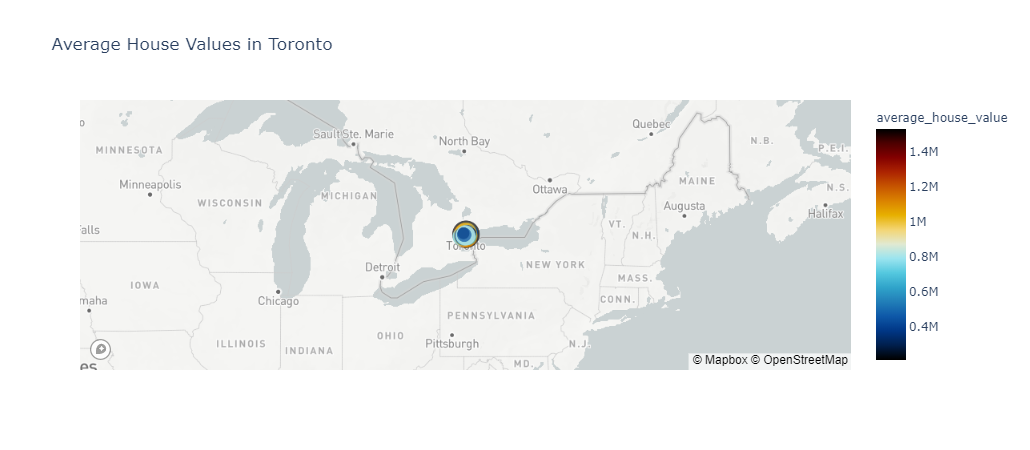

In [28]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
   # Load neighbourhoods coordinates data
    file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
    df_neighbourhood_locations = pd.read_csv(file_path)
    df_neighbourhood_locations.head()
    
    # Calculate the mean values for each neighborhood
    mean_value_neighbourhood = to_data.groupby("neighbourhood").mean()
    mean_value_neighbourhood.reset_index(inplace=True)
    mean_value_neighbourhood.head()
    
    # Join the average values with the neighbourhood locations

    combined_df = df_neighbourhood_locations.merge(mean_value_neighbourhood, on = "neighbourhood", how = "outer")
    combined_df.head()
    
    # Create a scatter mapbox to analyze neighbourhood info
    scatter_map = px.scatter_mapbox(
    combined_df,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    zoom=4,
    title = "Average House Values in Toronto",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name = "neighbourhood",
    hover_data = ["single_detached_house",
                  "apartment_five_storeys_plus",
                  "movable_dwelling",
                  "semi_detached_house",
                  "row_house",
                  "duplex",
                  "apartment_five_storeys_less",
                  "other_house"]
    )
    
    return scatter_map
neighbourhood_map()

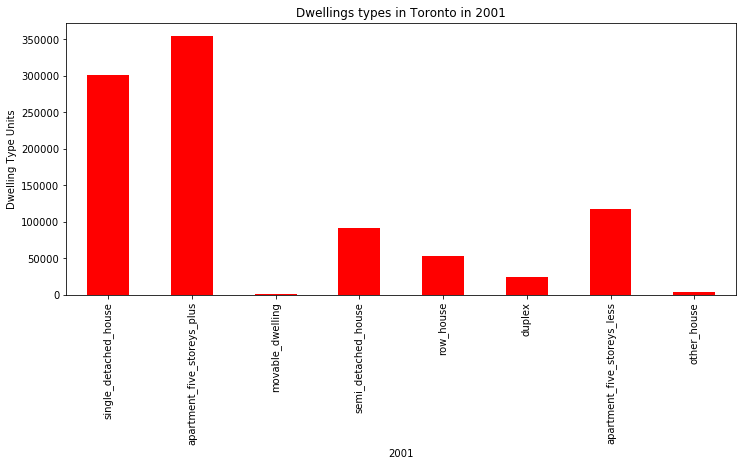

In [102]:
def create_bar_chart(year):
    """
    Create a barplot based in the data argument.
    """
    # Create a bar chart per year to show the number of dwelling types
    dwellings_type = dwellings_sum.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
    
    if year == 2001:
        # Bar chart for 2001
        plt.clf()
        data_2001 = dwellings_type.iloc[0].plot.bar(figsize=[12,5], 
                                            color = "red", 
                                            title="Dwellings types in Toronto in 2001"
                                            )
        plt.xlabel("2001")
        plt.ylabel("Dwelling Type Units")
#         plot_2001 = pn.pane.Matplotlib(data_2001)
        plot_2001 = data_2001
        return plot_2001
    
    elif year == 2006:
        
        # Bar chart for 2006
        plt.clf()
        data_2006 = dwellings_type.iloc[1].plot.bar(figsize=[12,5], color="darkblue", title="Dwellings types in Toronto in 2006")
        plt.xlabel("2006")
        plt.ylabel("Dwelling Type Units")
        data_2006
        plot_2006 = data_2006
        return plot_2006
        
    elif year == 2011:
        
        # Bar chart for 2011
        plt.clf()
        data_2011 = dwellings_type.iloc[2].plot.bar(figsize=[12,5], color = "yellow", title="Dwellings types in Toronto in 2011")
        plt.xlabel("2011")
        plt.ylabel("Dwelling Type Units")
        data_2011
        plot_2011 = data_2011 
        return plot_2011
    
    elif year == 2016:
        
        # Bar chart for 2016
        plt.clf()
        data_2016 = dwellings_type.iloc[3].plot.bar(figsize=[12,5], color = "purple", title="Dwellings types in Toronto in 2016")

        plt.xlabel("2016")
        plt.ylabel("Dwelling Type Units")
        data_2016
        plot_2016 = data_2016
        return plot_2016
    

    
create_bar_chart(2001)
# create_bar_chart(2006)



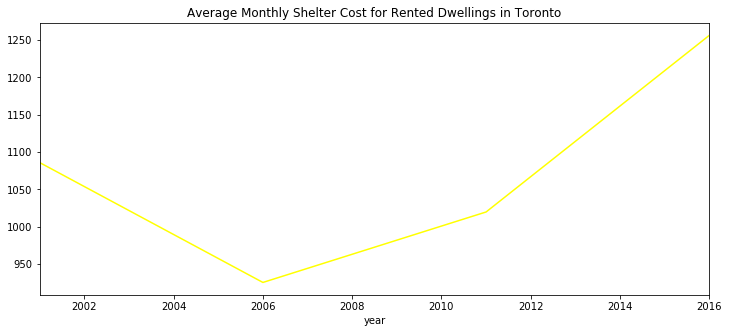

In [91]:
def create_line_chart(kind):
    """
    Create a line chart based in the data argument.
    """
    if kind == "rented":
        plt.clf()
        plot_rented_dwellings = avg_monthly_shelter_costs["shelter_costs_rented"].plot.line(figsize=[12,5], 
                                                                                    color="yellow",
                                                                                    title="Average Monthly Shelter Cost for Rented Dwellings in Toronto")
        return plot_rented_dwellings
    
    elif kind == "owned":
        plt.clf()
        plot_owned_dwellings = avg_monthly_shelter_costs["shelter_costs_owned"].plot.line(figsize=[12,5], 
                                                                                  color="darkblue", 
                                                                                  title="Average Monthly Shelter Cost for Owned Dwellings in Toronto")
        return plot_owned_dwellings

# create_line_chart("owned")
# create_line_chart("rented")
   

In [36]:
def average_house_value():
    """Average house values per year."""
    # Calculate the average house value per
    avg_housing_value = dwellings_mean["average_house_value"]
    avg_housing_value_plot =  avg_housing_value.plot.line(figsize=[12,5], 
                            color="blue",
                            title="Average House Value in Toronto")
    return(avg_housing_value, avg_housing_value_plot)
#average_house_value()

In [10]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # Create a new DataFrame with the mean house values by neighbourhood per year
    neighbourhood_df = to_data.groupby(["year", "neighbourhood"]).mean()
    neighbourhood_mean_house_value = neighbourhood_df[["average_house_value"]]
    # Use hvplot to create an interactive line chart of the average house value per neighbourhood
    # The plot should have a dropdown selector for the neighbourhood
    neighbourhood_value_plot= neighbourhood_mean_house_value.hvplot.line("year", groupby="neighbourhood", width= 500).opts(yformatter="%.0f")
    return neighbourhood_value_plot
#average_value_by_neighbourhood()

In [11]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    
    # Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
    # The plot should have a dropdown selector for the neighbourhood
    dwellings_types_neighbourhood = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
    dwellings_types_neighbourhood_plot = dwellings_types_neighbourhood.hvplot.bar("year", groupby="neighbourhood", width= 700, height = 500, rot=90)
    
    return dwellings_types_neighbourhood_plot
#number_dwelling_types()

In [12]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    plotly_figure = to_data.reset_index()
    row_facet = px.bar(plotly_figure, 
                       x = "neighbourhood", 
                       y = "average_house_value",
                       facet_row = "year",
                       title = "Average House Values in Toronto per Neighbourhood",
                       height = 1000,
                       width = 1300,
                       color = "average_house_value")
    return row_facet
#average_house_value_snapshot()

In [73]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    top_10 = top_10_expensive_neighbourhood.hvplot.bar(x = "neighbourhood", 
                                          y = "average_house_value", 
                                          rot=90, height= 500,
                                         title= "Top 10 Expensive Neighbourhoods in Toronto").opts(yformatter="%.0f")
    return top_10
top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

In [14]:
def sunburst_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # Fetch the data from all expensive neighbourhoods per year.
    expensive_neighbourhoods_yearly_df = to_data.reset_index()
    
    # Selecteing top-10 most expensive neighbourhoods from each year
    expensive_neighbourhoods_yearly= expensive_neighbourhoods_yearly_df.sort_values(
                                                                            ['year', 
                                                                             'average_house_value'
                                                                            ], 
                                                                                ascending=False).groupby('year').head(10)

    sunburst_chart = expensive_neighbourhoods_yearly.sort_values(["year", "average_house_value"])
    # Create the sunburst chart
    sunburst_figure = px.sunburst(sunburst_chart, 
                              path =["year", "neighbourhood"], 
                              values = "average_house_value",
                              hover_data=["shelter_costs_owned","shelter_costs_rented"],
                              color=("shelter_costs_owned")
                              )
    return sunburst_figure
#sunburst_cost_analysis()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

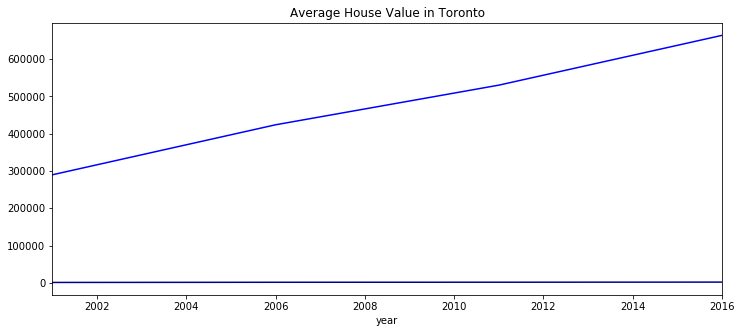

In [93]:
# Create a Title for the Dashboard
title = pn.pane.Markdown("""#An Analysis of Toronto Real Estate Market from 2001 to 2016""",width = 800)

# Define a welcome text
intro = pn.pane.Markdown(
"""
This Interactive Dashboard (using PyViz Panel) shows real estate data for Toronto from
2001 to 2016.     
Navigate across the various tabs to explore different types of analysis.     

  
The dashboard has 6 tabs as follows:  

1. Intro - Containing short message providing context on the dashboard data.  
2. Geospatial Analysis through MapBox Scatter Figure, containing an interactive map with data on    
      - Average prices of dwellings per neighbourhood    
      - Number of Dwellings in each neighbourhood  
      
3. Analysis of number of each dwelling units in Toronto in 2001, 2006, 2011 and 2016 respectively.   
      - It is compared with Average monthly dwelling costs for rented or owned properties in Toronto.  
      
4. Pricing Analysis   
      - Average of house value for Toronto overall  
      - Average of house value for each neighbourhood in Toronto   
      - This also contains an interactive map showing the number of dwelling types in each year by each neighbourhood.  
      
5. This shows the average house value in each neighbourhood in Toronto through an interactive chart   

6. This shows an analysis of the 10 most expensive neighbourhoods in Toronto through a bar chart and a sunburst chart   
       
"""
)

# Create a tab layout for the dashboard
tab_2_column = pn.Column(("## Overall Neighbourhood map for each dwelling type in numbers and value"),
                         neighbourhood_map)

tab_3_row1 = pn.Row(create_bar_chart(2001), create_bar_chart(2006))
tab_3_row2 = pn.Row(create_bar_chart(2011), create_bar_chart(2016))

rented = create_line_chart("rented")
owned = create_line_chart("owned")
tab_3_row3 = pn.Row(rented, owned)

tab_3_column = pn.Column(tab_3_row1,
                         tab_3_row2,
                         tab_3_row3) 




tab_4_row = pn.Row(average_house_value, average_value_by_neighbourhood)
tab_4_column = pn.Column(("## Pricing Analysis"), 
                         ("### Average House Value in Toronto"),
                         tab_4_row,
                         ("### Number of dwellings in each neighbourhood in each year in Toronto"),
                         number_dwelling_types)


tab_5_column = pn.Column(("## Average House Price in each neighbourhood in Toronto"), 
                         average_house_value_snapshot)


tab_6_column = pn.Column(("## Most Expensive neighbourhoods of Toronto"), 
                         top_most_expensive_neighbourhoods, 
                         sunburst_cost_analysis)



# Create the main dashboard
dashboard = pn.Tabs(
    ("Intro",intro),
    ("Overall GeoSpatial Analysis", tab_2_column),
    ("Pricing & Dwellings Growth Analysis", tab_3_column),
    ("Pricing Analysis", tab_4_column),
    ("House Value per Neighbourhood",tab_5_column),
    ("Expensive Neighbourhoods", tab_6_column)
)


## Serve the Panel Dashboard

Column(height=768, sizing_mode='fixed', width=1024)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=1024)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [3] Row
            [0] Column
                [0] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
            [1] Column
                [0] Plotly(Figure)
        [4] Row
            [0] HoloViews(Bars)
            [1] Plotly(Figure)
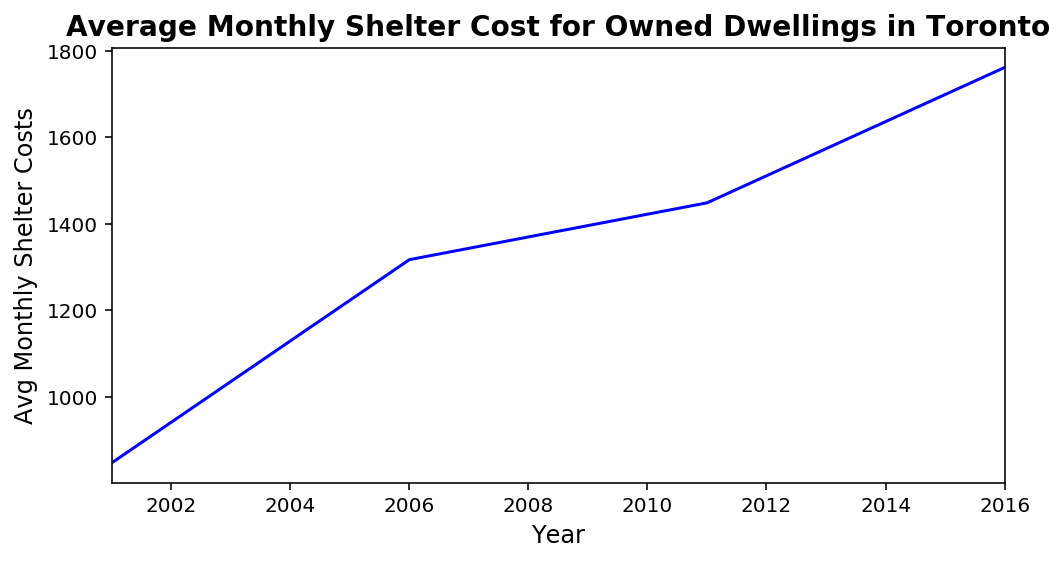
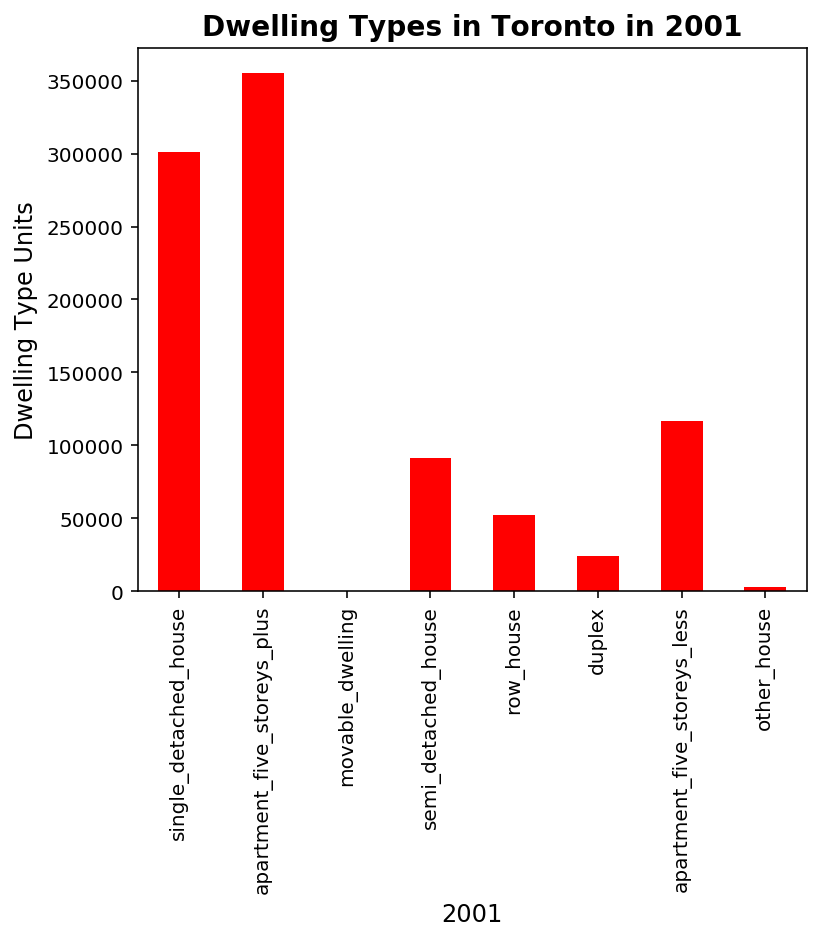
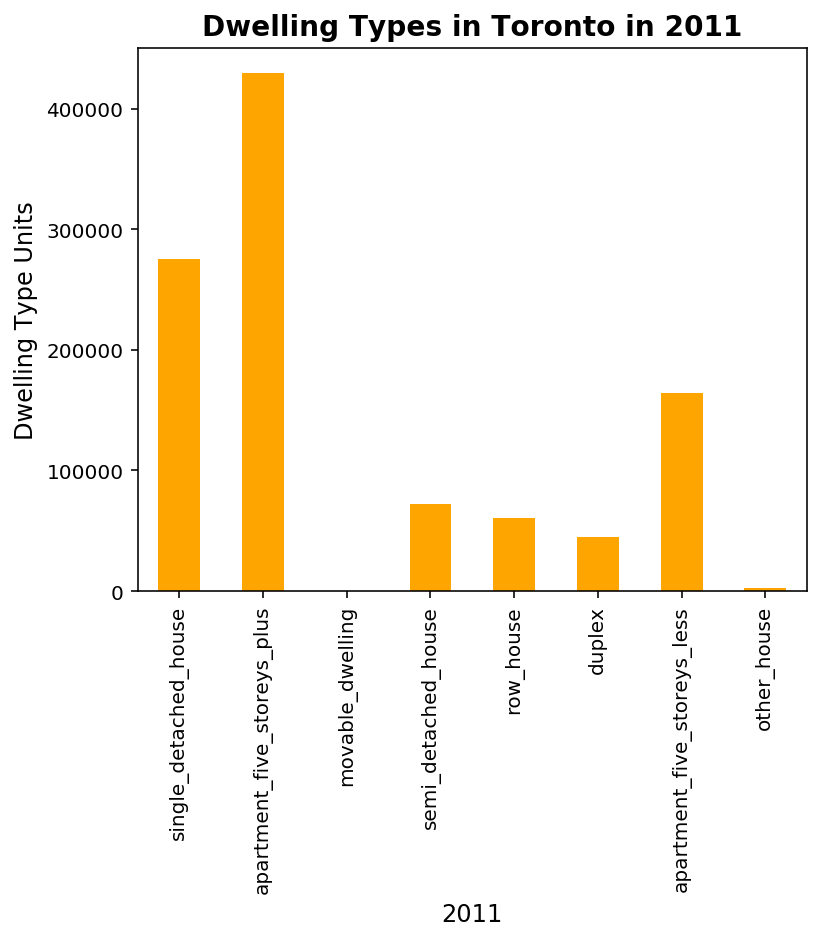
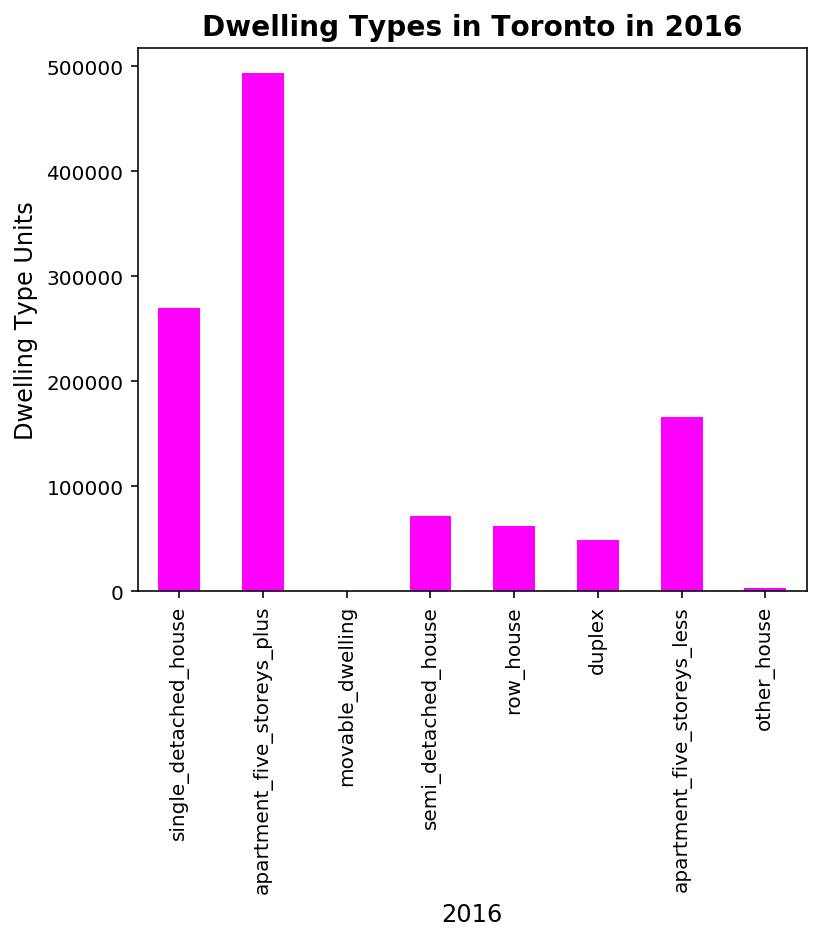
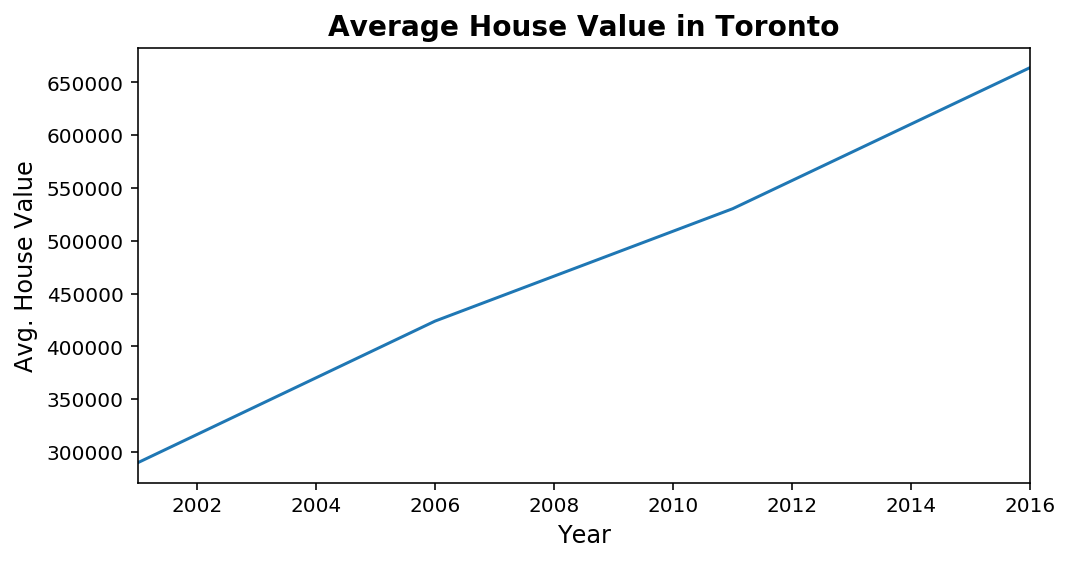
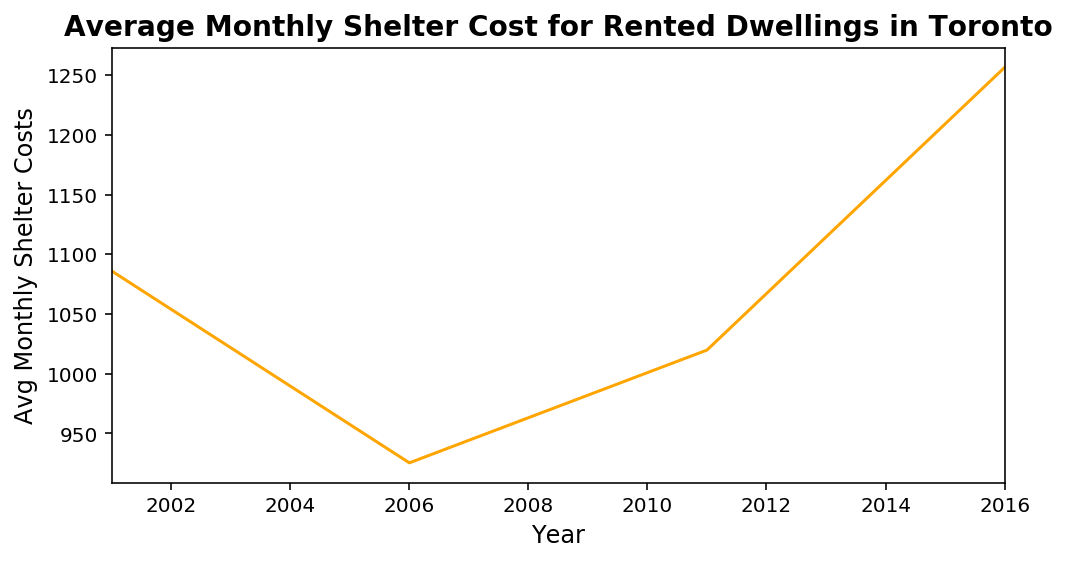
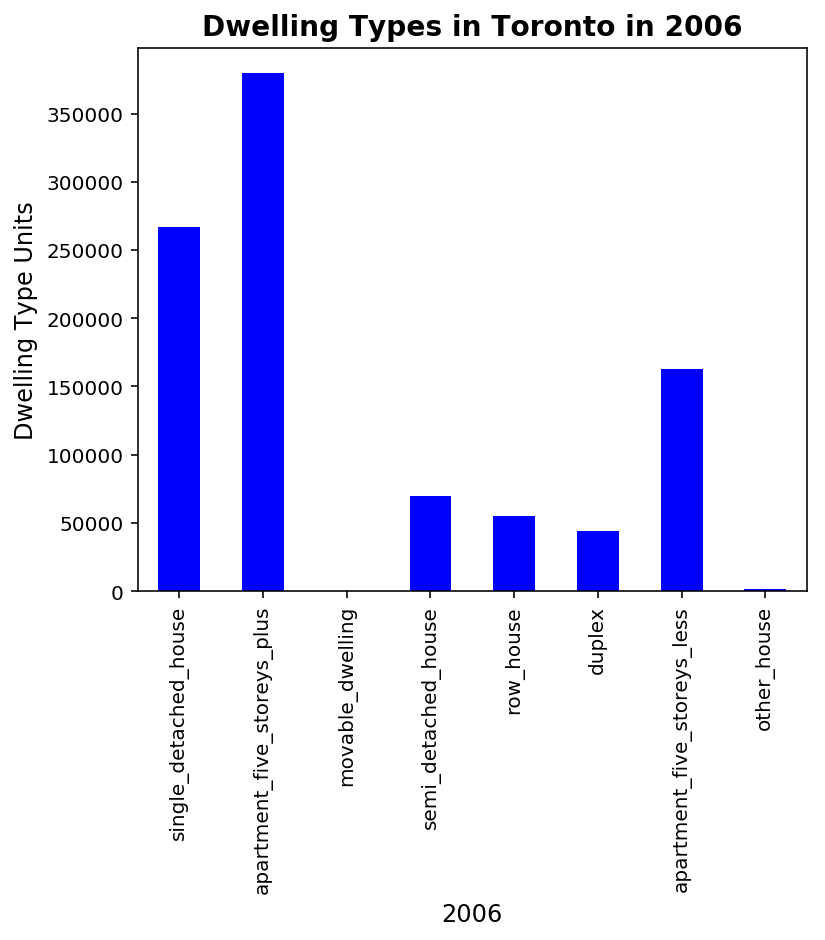

In [8]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [9]:
# neighbourhood_map().show()

In [10]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [11]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [12]:
# average_house_value()

In [13]:
# average_value_by_neighbourhood()

In [14]:
# number_dwelling_types()

In [15]:
# average_house_value_snapshot()

In [16]:
# top_most_expensive_neighbourhoods()

In [17]:
# sunburts_cost_analysis()